In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
plt.style.use('seaborn')
sns.set(font_scale=2.5)
#import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [275]:
submission=pd.read_csv('data/sample_submission.csv')
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

#데이터셋 확인

In [279]:
#데이터셋 확인과 이상치 및 결측치 처리
submission.shape, train.shape, test.shape

((418, 2), (891, 12), (418, 11))

In [280]:
submission.columns, train.columns, test.columns

(Index(['PassengerId', 'Survived'], dtype='object'),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [281]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [282]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [283]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [284]:
train.dtypes, test.dtypes

(PassengerId      int64
 Survived         int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object,
 PassengerId      int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object)

Text(0.5, 1.0, 'missing testset')

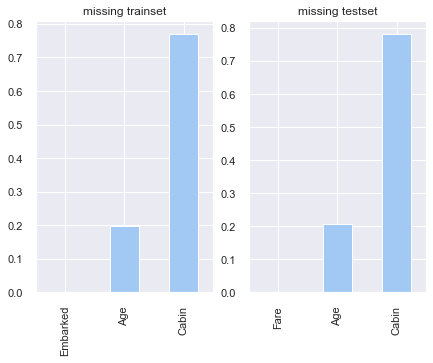

In [285]:
#결측치 확인
missing_train=train.isnull().sum()/train.shape[0]
missing_train=missing_train[missing_train>0]
missing_train.sort_values(inplace=True)
missing_test=test.isnull().sum()/test.shape[0]
missing_test=missing_test[missing_test>0]
missing_test.sort_values(inplace=True)

f,ax=plt.subplots(1,2,figsize=(7,5))
missing_train.plot.bar(ax=ax[0])
missing_test.plot.bar(ax=ax[1])
ax[0].set_title('missing trainset')
ax[1].set_title('missing testset')

#Canbin은 결측치가 80%로 분석 대상에서 제외한다

In [286]:
train.describe(), test.describe()

(       PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  714.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.699118    0.523008   
 std     257.353842    0.486592    0.836071   14.526497    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   20.125000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   38.000000    1.000000   
 max     891.000000    1.000000    3.000000   80.000000    8.000000   
 
             Parch        Fare  
 count  891.000000  891.000000  
 mean     0.381594   32.204208  
 std      0.806057   49.693429  
 min      0.000000    0.000000  
 25%      0.000000    7.910400  
 50%      0.000000   14.454200  
 75%      0.000000   31.000000  
 max      6.000000  512.329200  ,
        PassengerId      Pclass         Age       SibSp      

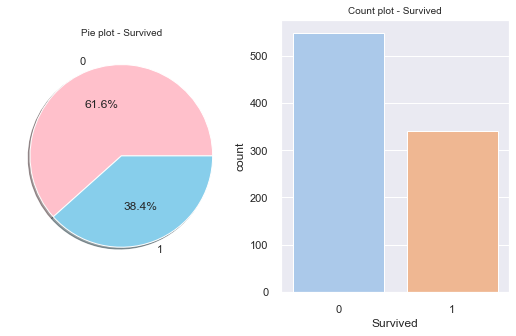

In [287]:
f, ax=plt.subplots(1, 2, figsize=(9,5))

train['Survived'].value_counts().plot.pie(explode=[0,0.0],autopct='%1.1f%%', 
ax=ax[0], shadow='True', colors=['pink', 'skyblue'])
ax[0].set_title('Pie plot - Survived', fontsize=10)
ax[0].set_ylabel('')

sns.set(font_scale=1)
sns.set_palette('pastel')
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Count plot - Survived', fontsize=10)

plt.show()

1) 수치형 컬럼과 범주형 컬럼이 나뉨 <br>
2) train셋에서 Embarked, Age, Cabin 컬럼의 결측치가 확인됨 <br>
3) test셋에서 Fare, Age, Cabin 컬럼의 결측치가 확인됨 <br>
4) Cabin컬럼은 결측치가 80%가 넘어가기 때문에 분석 대상에서 제외함

#탐색적 데이터 분석

Text(0.5, 1.0, 'Survived Pclass')

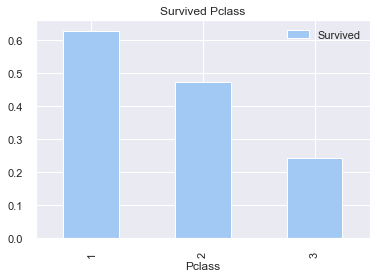

In [288]:
#표 등급에 따른 생존률
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar().set_title('Survived Pclass')

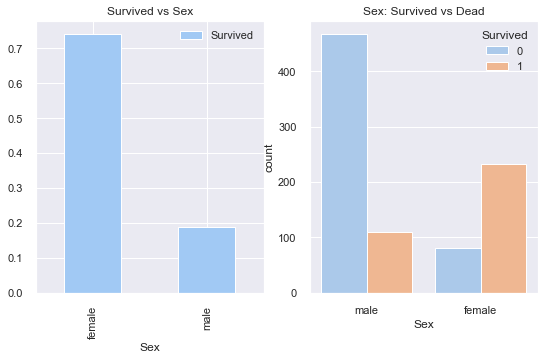

In [289]:
#성별에 따른 생존률
f, ax = plt.subplots(1, 2, figsize=(9, 5))
train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

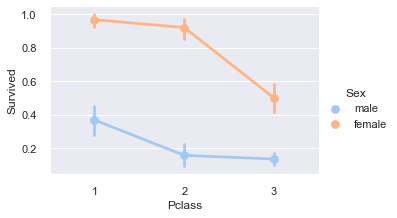

In [290]:
#성별과 티켓 등급에 따른 생존률
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train, size=3, aspect=1.5)

최고령 승객: 80.0 Years
최연소 승객: 0.4 Years
승객 평균연령: 29.7 Years


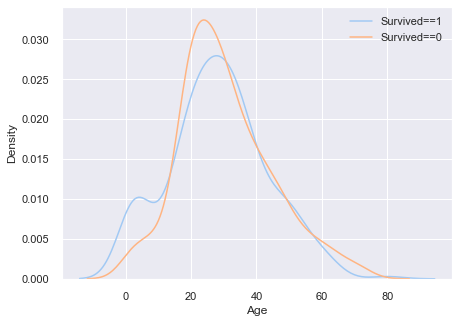

In [291]:
#나이에 따른 생존률
print('최고령 승객: {:.1f} Years'. format(train['Age'].max()))
print('최연소 승객: {:.1f} Years'. format(train['Age'].min()))
print('승객 평균연령: {:.1f} Years'. format(train['Age'].mean()))
fig, ax=plt.subplots(1,1,figsize=(7,5))
sns.kdeplot(train[train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(train[train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived==1', 'Survived==0'])

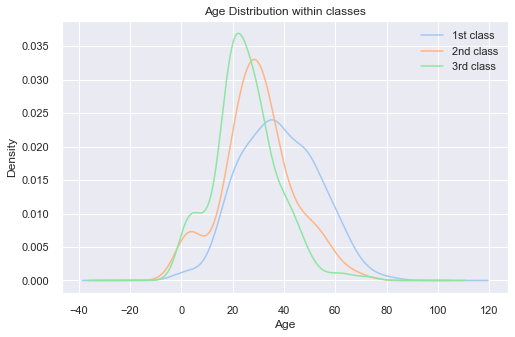

In [292]:
#나이와 티켓 등급에 따른 생존률
plt.figure(figsize=(8,5))
train['Age'][train['Pclass']==1].plot(kind='kde')
train['Age'][train['Pclass']==2].plot(kind='kde')
train['Age'][train['Pclass']==3].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class'])

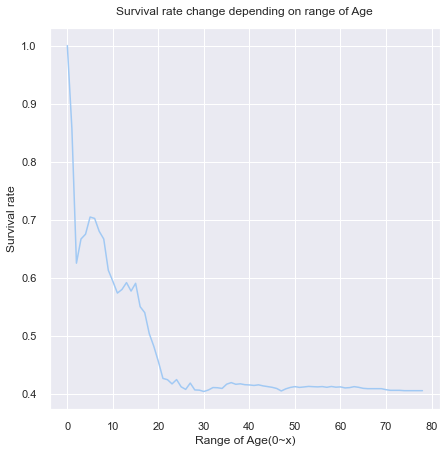

In [293]:
#나이에 따른 생존 확률 누적 분포
cummulate_survival_ratio=[]
for i in range(1,80):
    cummulate_survival_ratio.append(train[train['Age']<i]['Survived'].sum()/
    len(train[train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

<AxesSubplot:xlabel='Embarked'>

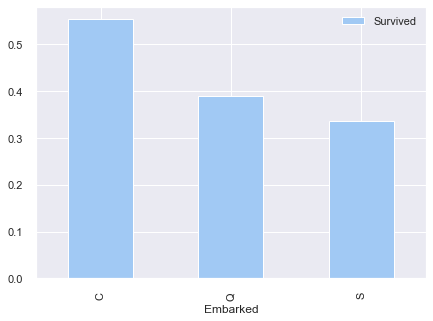

In [294]:
#탑승 항구에 따른 생존 확률
f, ax=plt.subplots(1,1, figsize=(7,5))
train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().plot.bar(ax=ax)

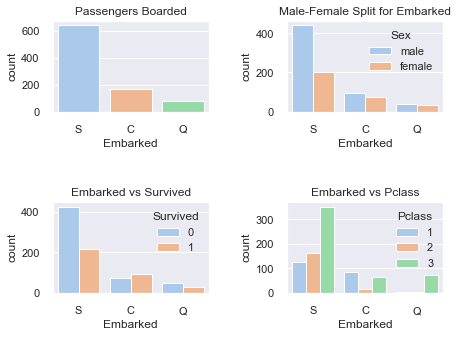

In [295]:
# 탑승 항구와 타 변수와의 상관관계
f, ax=plt.subplots(2,2, figsize=(7,5))
sns.countplot('Embarked', data=train, ax=ax[0,0])
ax[0,0].set_title('Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=train, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=train, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=train, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.5, hspace=1)
plt.show()

In [296]:
#새로운 변수인 '가족의 수' 생성
train['FamilySize']=train['SibSp']+train['Parch']+1 #본인 포함
test['FamilySize']=test['SibSp']+test["Parch"]+1
print('Maximum size of Family', train['FamilySize'].max())
print('Minimum size of Family', test['FamilySize'].min())

Maximum size of Family 11
Minimum size of Family 1


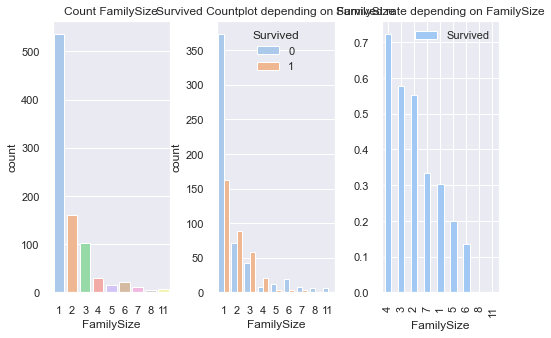

In [297]:
#가족의 수에 따른 생존확률
f,ax=plt.subplots(1, 3, figsize=(8,5))
sns.countplot(train['FamilySize'], data=train, ax=ax[0])
ax[0].set_title('Count FamilySize')

sns.countplot(train['FamilySize'], hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Survived Countplot depending on FamilySize')

train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('Survived rate depending on FamilySize')

plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.show()

In [298]:
#왜도와 첨도 확인을 위해 범주형, 수치형 나누기
numerical_feats=train.dtypes[train.dtypes!='object'].index
categorical_feats=train.dtypes[train.dtypes=='object'].index

In [299]:
for col in numerical_feats:
    print('{:15}'.format(col),
    'Skewness: {:05.2f}'.format(train[col].skew()),'  ',
    'Kutosis: {:06.2f}'.format(train[col].kurt())
    )

PassengerId     Skewness: 00.00    Kutosis: -01.20
Survived        Skewness: 00.48    Kutosis: -01.78
Pclass          Skewness: -0.63    Kutosis: -01.28
Age             Skewness: 00.39    Kutosis: 000.18
SibSp           Skewness: 03.70    Kutosis: 017.88
Parch           Skewness: 02.75    Kutosis: 009.78
Fare            Skewness: 04.79    Kutosis: 033.40
FamilySize      Skewness: 02.73    Kutosis: 009.16


1) 왜도(Skewness) : a=0 정규분포, a<0 오른쪽 치우침, a>0 왼쪽 치우침 <br>
2) 첨도(Kutosis) : a=3 정규분포, a<3 정규분포 대비 완만, a>3 정규분포 대비 뾰족 <br>
3) 왜도와 첨도값을 확인하고 정규분포에 가깝게 만들어주기 위해 변수에 log 취함 (정규성을 높여 분석의 정확도 향상) <br>

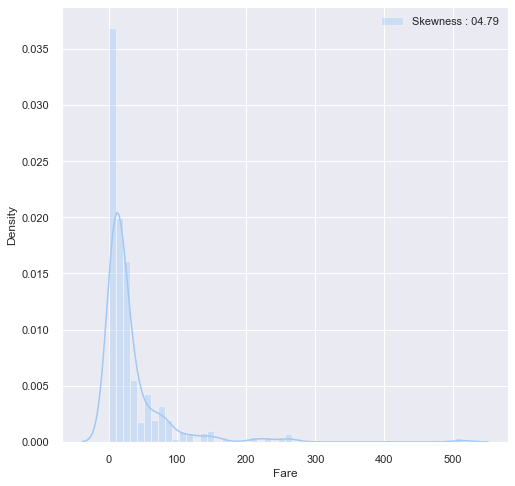

In [308]:
#Fare 첨도 시각화
f, ax=plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(train['Fare'], label='Skewness : {:05.2f}'.format(train['Fare'].skew()), ax=ax)
g=g.legend(loc='best')

In [309]:
#testset의 fare 결측치를 평균값으로 채우기
test.loc[test.Fare.isnull(), 'Fare']=test['Fare'].mean()

In [319]:
#첨도와 왜도가 심한 Fare 변수에 Log를 취해 정규화
train['Log_Fare']=np.log1p(train['Fare'])

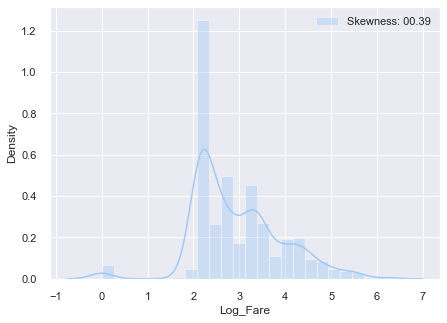

In [325]:
#정규화 결과 시각화
f, ax=plt.subplots(1,2,figsize=(7,5))
g=sns.distplot(train['Log_Fare'], label='Skewness: {:05.2f}'.format(train['Log_Fare'].skew()), ax=ax[0])
g=g.legend(loc='best')

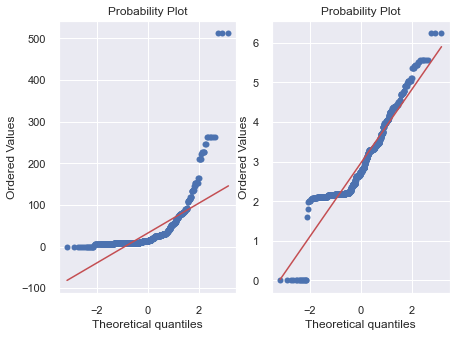

In [342]:
#정규화 전후의 probplot 확인
import scipy.stats
fig = plt.figure(figsize = (7,5))
fig.add_subplot(1,2,1)
res = scipy.stats.probplot(train['Fare'], plot=plt)
fig.add_subplot(1,2,2)
res = scipy.stats.probplot(train['Log_Fare'], plot=plt)

In [346]:
#Fare를 Log_Fare로 대치 후 기존 Log_Fare 삭제
train['Fare']=train['Log_Fare']
del train['Log_Fare']

<AxesSubplot:title={'center':'Pearson Correlation of Numerical Features'}>

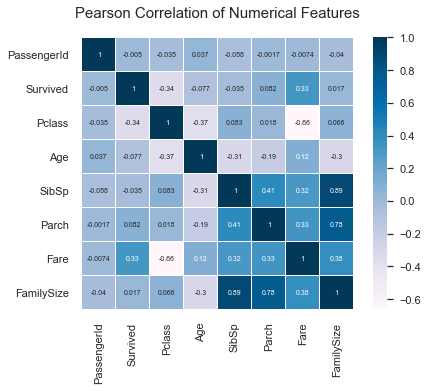

In [357]:
#수치형 변수간 상관계수 확인
heatmap_data=train[numerical_feats]
colormap=plt.cm.PuBu
plt.figure(figsize=(7,5))
plt.title('Pearson Correlation of Numerical Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidth=0.2, vmax=1.0,
square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':7})

1. 여자, 나이가 적을수록, 티켓 등급이 높을수록 생존자가 높은 것으로 나타남
2. C 탑승구를 이용한 승객의 생존자 비율이 높은 것으로 나타났으며 티켓 클래스가 높은 승객이 많기 때문인 것으로 분석됨
3. S 탑승구에서 가장 많은 승객, 특히 남자 승객이 많이 탑승했으며 3rd class 승객이 가장 많음
4. S 탑승구의 생존확률이 가장 낮음
5. 가족이 2~4명일 때 생존 확률이 가장 높으며 가족 수가 너무 많거나 작으면 생존 확률이 낮아짐
6. Fare변수의 왜도와 첨도가 커 정규화를 수행하였음
7. 피어슨 상관관계를 살펴본 결과 Fare에서 가장 큰 양의 상관관계를, Pclass에서 가장 큰 음의 상관관계를 보임

#특성공학